#                 Project 2 : Predicting diabetes outcome for women

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [3]:
data = pd.read_csv("../TAIPEI_diabetes.csv")

##                                Model Selection, Comparison & Evaluation

### Features & Target

In [14]:
X = data.drop(columns=['PatientID', 'Diabetic'])
y = data['Diabetic']    

### Train & Test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### List of models to test

In [6]:
models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

### Train & Evaluate each model

In [16]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    results[name] = accuracy
    print(f"{name}: Accuracy = {accuracy:.2f}")

Gradient Boosting: Accuracy = 0.95


d:\anaconda\envs\myenv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost: Accuracy = 0.94


### Visualize the results

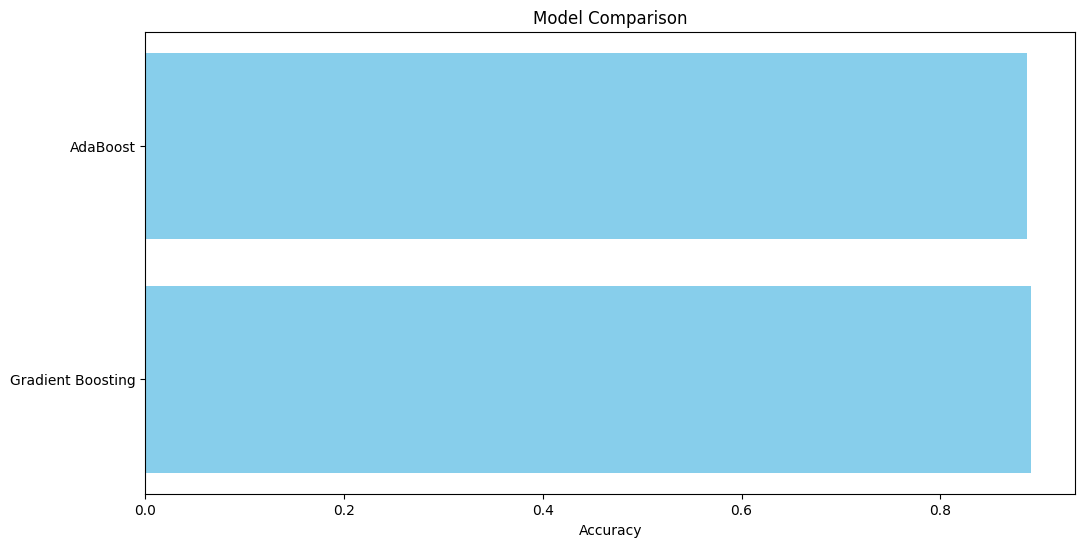

In [8]:
plt.figure(figsize=(12, 6))
plt.barh(list(results.keys()), list(results.values()), color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Comparison")
plt.show()

##                                                   Part 6 : Models Optimisation

### Fonction for evaluating models

In [9]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

###  AdaBoost

In [17]:
adb_grid = AdaBoostClassifier(learning_rate=1, n_estimators=200)
adb_grid.fit(X_train, y_train)

d:\anaconda\envs\myenv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=1, n_estimators=200)

In [18]:
# Saving the model
with open("ada_boost_model.pkl", "wb") as file:
    pickle.dump(adb_grid, file)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cccdc730-e07c-4449-8635-e48bc2c3f083' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>